Predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Performing EDA
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
#Descriptive Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Exploring Data Variable
df.Survived.unique()

array([0, 1], dtype=int64)

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
#Checking Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

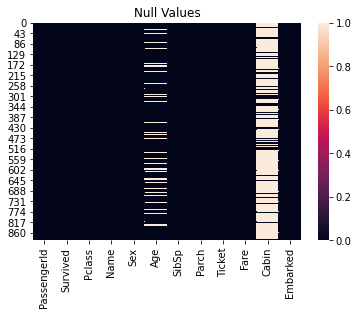

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are Null Values in Age,Cabin and Embarked Columns.

In [12]:
df["Age"]=df["Age"].replace(np.nan, df["Age"].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [13]:
#dropping the Cabin Column
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
#dropping the Name Column
df.drop('Name',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [15]:
#dropping the Ticket Column
df.drop('Ticket',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

There are no Null Values in dataset now.

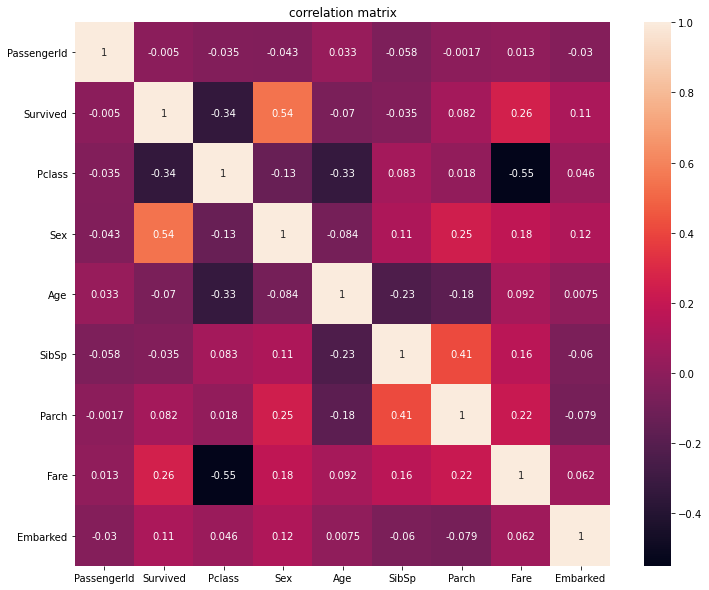

In [19]:
#Checking Correlation
dfcor=df.corr()
plt.figure(figsize=[12,10])
sns.heatmap(dfcor,annot=True)
plt.title("correlation matrix")
plt.show()

In [20]:
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


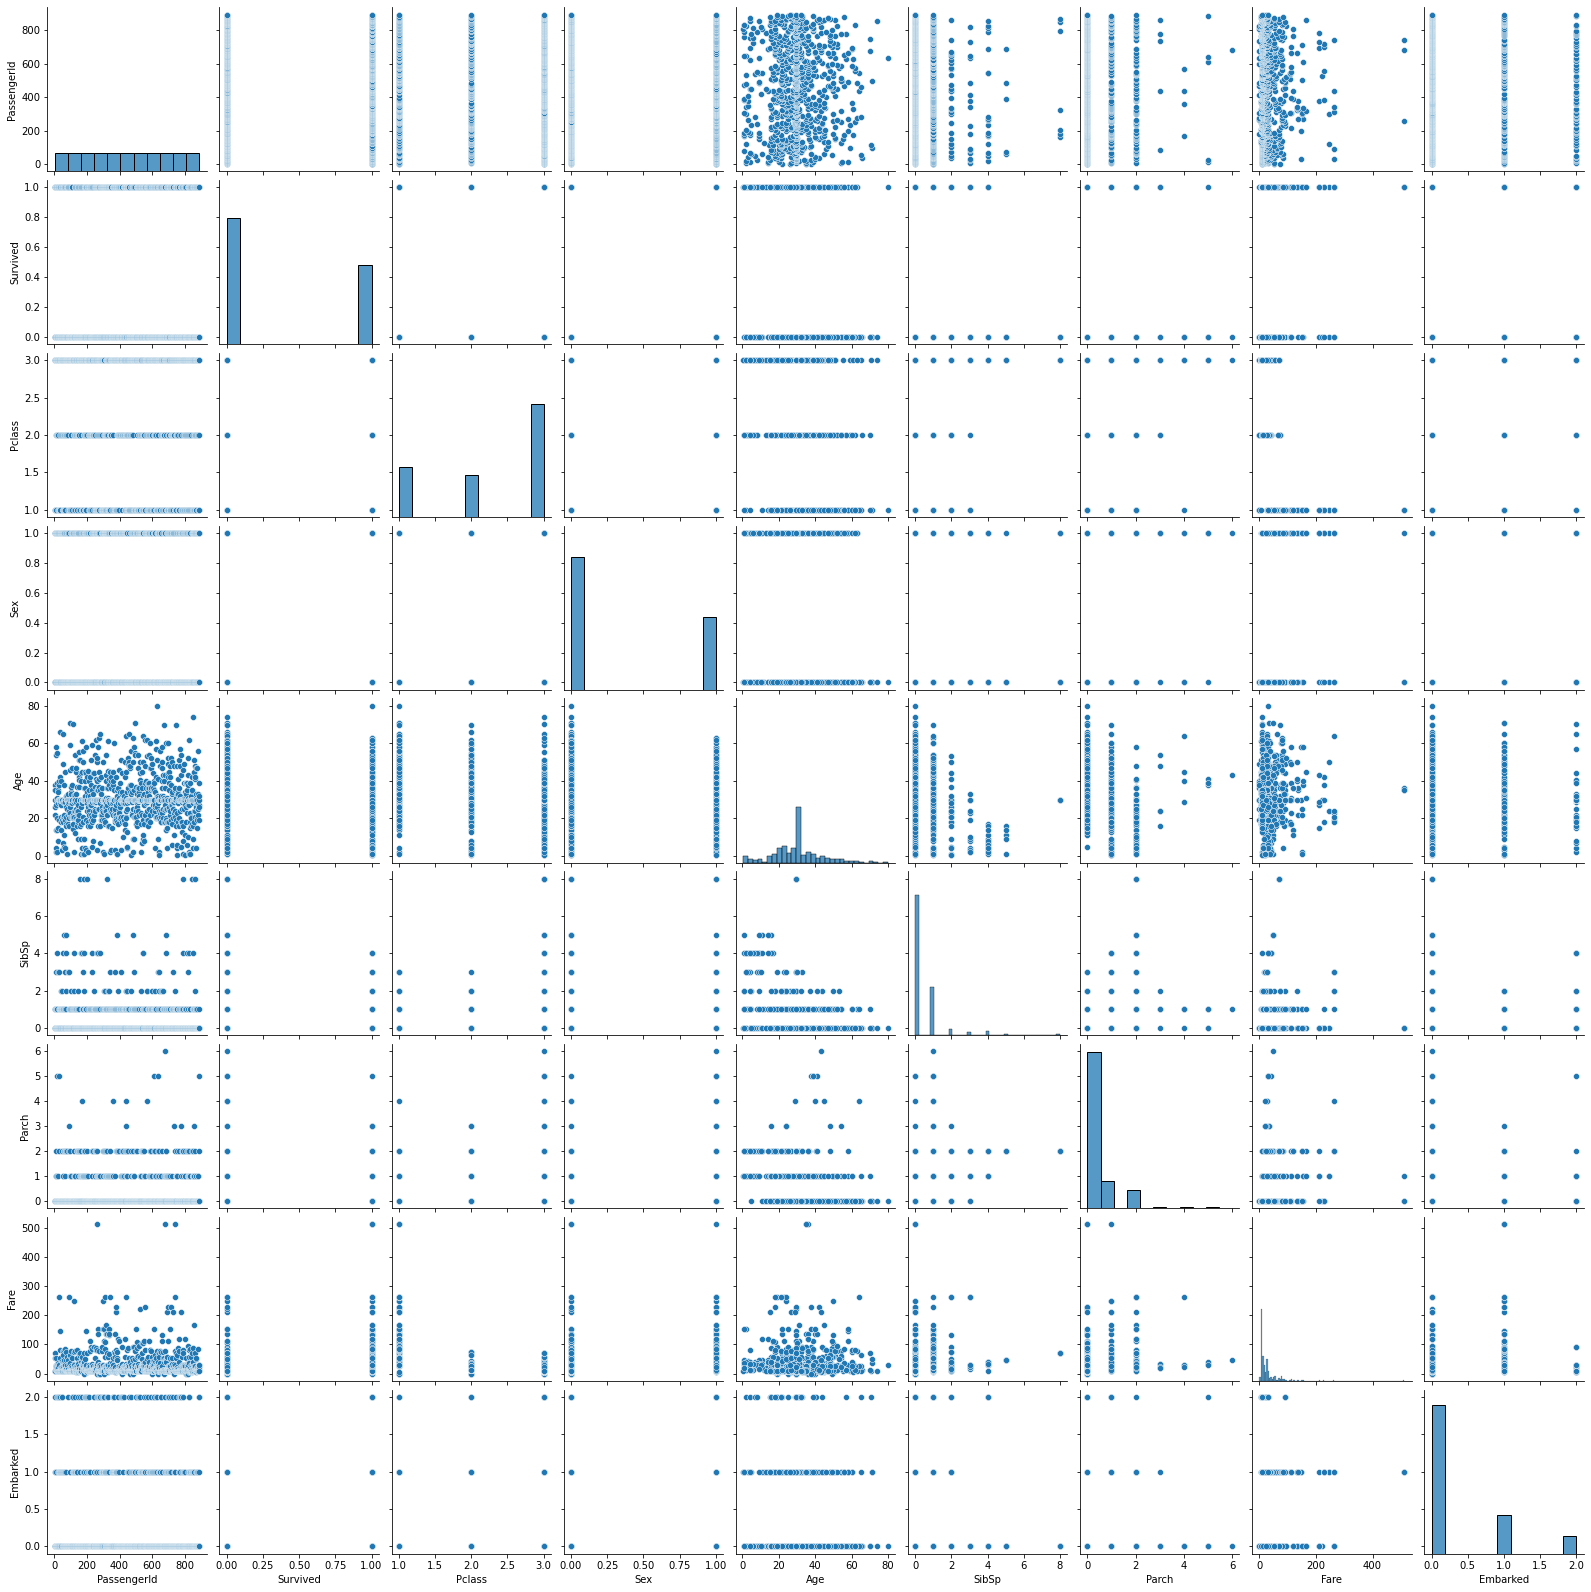

In [21]:
sns.pairplot(df)

In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [23]:
#dropping the Fare Column
df.drop('Fare',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0
1,2,1,1,1,38.0,1,0,1
2,3,1,3,1,26.0,0,0,0
3,4,1,1,1,35.0,1,0,0
4,5,0,3,0,35.0,0,0,0


Plotting Outliers

PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
SibSp          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Parch                AxesSubplot(0.125,0.125;0.110714x0.343182)
Embarked          AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

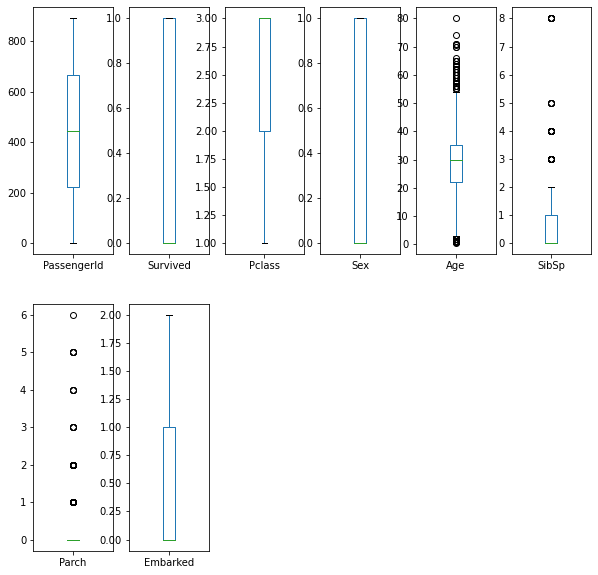

In [24]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

It shows we have outliers in Age, SibSp and Parch

In [25]:
#removing outliers
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.43279337, 0.47367361,
        0.56883712],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.43279337, 0.47367361,
        1.00518113],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.4745452 , 0.47367361,
        0.56883712],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.43279337, 2.00893337,
        0.56883712],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.4745452 , 0.47367361,
        1.00518113],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.4745452 , 0.47367361,
        2.57919938]])

In [27]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  50,  59,  68,  71,  86,  96, 116, 119, 159, 164,
       167, 171, 180, 182, 201, 233, 261, 266, 278, 324, 360, 386, 437,
       438, 480, 493, 541, 542, 567, 610, 630, 638, 672, 678, 683, 686,
       736, 745, 774, 787, 792, 813, 824, 846, 850, 851, 858, 863, 885],
      dtype=int64), array([6, 5, 6, 5, 5, 5, 5, 6, 4, 4, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 6, 5, 4, 5, 5, 6, 6, 4, 6, 4, 6, 5, 5, 6, 4, 6, 5, 5,
       5, 5, 5, 5, 4, 6, 5, 6], dtype=int64))


In [28]:
z[13][1]

0.7892723355548015

In [29]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0
1,2,1,1,1,38.0,1,0,1
2,3,1,3,1,26.0,0,0,0
3,4,1,1,1,35.0,1,0,0
4,5,0,3,0,35.0,0,0,0


In [30]:
#Splitting Data into feature and target variable.

In [31]:
y=df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
x=df.iloc[:,2:9]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,0
1,1,1,38.0,1,0,1
2,3,1,26.0,0,0,0
3,1,1,35.0,1,0,0
4,3,0,35.0,0,0,0


In [33]:
x.shape

(891, 6)

In [34]:
y.shape

(891,)

In [35]:
x.skew()

Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Embarked    1.543397
dtype: float64

we can see the skewness in dataset. we will remove the skewness using power_transform

In [36]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [37]:
x.skew()

Pclass     -0.441438
Sex         0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Embarked    1.013716
dtype: float64

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
#Finding best random_state
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on random_state",maxRS)

Best Accuracy is 0.8659217877094972 on random_state 6


we have found the random_state is 6, now we will create train_test_split by using random state

In [44]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7541899441340782
[[94 19]
 [25 41]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       113
           1       0.68      0.62      0.65        66

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



In [45]:
#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7988826815642458
[[100  13]
 [ 23  43]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       113
           1       0.77      0.65      0.70        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [46]:
#Support Vector Machine Classifier
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7932960893854749
[[100  13]
 [ 24  42]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       113
           1       0.76      0.64      0.69        66

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



In [48]:
#Random Forest Classfier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8044692737430168
[[95 18]
 [17 49]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       113
           1       0.73      0.74      0.74        66

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [49]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
mnb=GaussianNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7318435754189944
[[86 27]
 [21 45]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       113
           1       0.62      0.68      0.65        66

    accuracy                           0.73       179
   macro avg       0.71      0.72      0.72       179
weighted avg       0.74      0.73      0.73       179



Random Forest Classifier is producing good accuracy.

In [50]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
#Creating paramter list to pass in GridSearch CV
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
              'criterion':['gini','entropy']}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)  
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

In [53]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7932960893854749

Saving the model in pickle format

In [54]:
import joblib
joblib.dump(RandomForestClassifier,"redwinemodel.pkl")

['redwinemodel.pkl']